In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [48]:
df=pd.read_excel("Predict_Amazon_Ratings.xlsx")

In [49]:
df.head()

,Product_Name,Brand_Name,Price,Rating,Reviews,Review Votes
0,Alltel LG AX390 AX-390 AX 390 SPECIAL FOR PAGE...,LG,38.95,4,it was what i needed.,0.0
1,Alltel LG AX390 AX-390 AX 390 SPECIAL FOR PAGE...,LG,38.95,2,This phone was in great shape although I could...,0.0
2,AT&T LG CU405 No Contract Push To Talk Quad Ba...,LG,64.95,1,"Not good, stopped working after 2 weeks, next ...",0.0
3,AT&T LG CU405 No Contract Push To Talk Quad Ba...,LG,64.95,1,so my boyfriend bought this phone off my accou...,0.0
4,AT&T LG Neon GT365BLS QWERTY Camera Phone,LG,14.44,1,Disappointed - we need to tide over our accoun...,1.0


In [50]:
df.describe()

,Price,Rating,Review Votes
count,25760.000000,25859.000000,25114.000000
mean,222.707395,3.864573,1.040495
std,156.480990,1.525529,4.940106
min,5.990000,1.000000,0.000000
25%,99.990000,3.000000,0.000000
50%,199.000000,5.000000,0.000000
75%,325.000000,5.000000,1.000000
max,2000.000000,5.000000,219.000000


In [53]:
df.isna().sum()

Product_Name      0
Brand_Name        0
Price            99
Rating            0
Reviews           0
Review Votes    745
dtype: int64

In [52]:
df.loc[df.Reviews.isna()==True,'Reviews']='No Review'

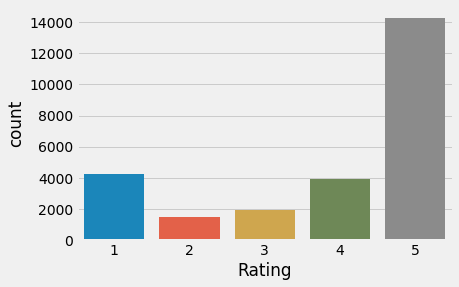

In [55]:
sns.countplot(df.Rating)

In [56]:
df.Rating=df.Rating.astype('category')

In [57]:
mapper={1:'Low', 2:'Low', 3:'Medium', 4:'High', 5:'High'}

df.Rating=df.Rating.map(mapper)

In [58]:
df.Rating=df.Rating.astype('category')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25859 entries, 0 to 25858
Data columns (total 6 columns):
Product_Name    25859 non-null object
Brand_Name      25859 non-null object
Price           25760 non-null float64
Rating          25859 non-null category
Reviews         25859 non-null object
Review Votes    25114 non-null float64
dtypes: category(1), float64(2), object(3)
memory usage: 1.0+ MB


In [60]:
df.head()

,Product_Name,Brand_Name,Price,Rating,Reviews,Review Votes
0,Alltel LG AX390 AX-390 AX 390 SPECIAL FOR PAGE...,LG,38.95,High,it was what i needed.,0.0
1,Alltel LG AX390 AX-390 AX 390 SPECIAL FOR PAGE...,LG,38.95,Low,This phone was in great shape although I could...,0.0
2,AT&T LG CU405 No Contract Push To Talk Quad Ba...,LG,64.95,Low,"Not good, stopped working after 2 weeks, next ...",0.0
3,AT&T LG CU405 No Contract Push To Talk Quad Ba...,LG,64.95,Low,so my boyfriend bought this phone off my accou...,0.0
4,AT&T LG Neon GT365BLS QWERTY Camera Phone,LG,14.44,Low,Disappointed - we need to tide over our accoun...,1.0


In [61]:
df=df.loc[:,['Reviews','Rating']]

In [62]:
df.head()

,Reviews,Rating
0,it was what i needed.,High
1,This phone was in great shape although I could...,Low
2,"Not good, stopped working after 2 weeks, next ...",Low
3,so my boyfriend bought this phone off my accou...,Low
4,Disappointed - we need to tide over our accoun...,Low


In [63]:
import spacy
nlp=spacy.load('en_core_web_sm')
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from nltk.stem.snowball import SnowballStemmer
snb=SnowballStemmer('english')
import re

In [64]:
stop=list(text.ENGLISH_STOP_WORDS)

In [65]:
vec=CountVectorizer(stop_words=stop)

In [66]:
tfid=TfidfVectorizer(stop_words=stop)

In [80]:
df.Reviews=df.Reviews.str.replace('\d+', '')

In [83]:
df.isna().sum()

Reviews    0
Rating     0
dtype: int64

In [82]:
df.loc[df.Reviews.isna()==True,'Reviews']='No Review'

In [84]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)


In [85]:
df.Reviews=df.apply(lambda x: lemmatizer(x['Reviews']), axis=1)

In [86]:
def punc_remove(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        if not word.is_punct | word.is_space:
            sent.append(word.text)
    return " ".join(sent)


In [89]:
df.Reviews=df.apply(lambda x: punc_remove(x['Reviews']), axis=1)

In [99]:
df.head()

,Reviews,Rating
0,-PRON- be what i need,High
1,this phone be in great shape although -PRON- c...,Low
2,not good stop work after week next time buy ne...,Low
3,so -PRON- boyfriend buy this phone off -PRON- ...,Low
4,disappoint -PRON- need to tide over -PRON- acc...,Low


In [95]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
nbc=MultinomialNB()
glm=LogisticRegression(class_weight='balanced',solver='lbfgs')

In [96]:
pipe1=Pipeline(steps=[('cvec',vec),('glm',glm)])

In [97]:
pipe2=Pipeline(steps=[('tfidf',tfid),('glm',glm)])

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [105]:
X=df.loc[:,'Reviews']
y=df.loc[:,'Rating']

In [106]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [107]:
pipe1.fit(X_train, y_train)

C:\Users\bishw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\bishw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bishw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bishw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['whenever', 'themselves',
                                             'hundred', 'an', 'may', 'nobody',
                                             'even', 'can', 'became', 'bottom',
                                             '...
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('glm',
                 LogisticRegression(C=1.0, class

In [109]:
print(classification_report(y_test, pipe1.predict(X_test)))

              precision    recall  f1-score   support

        High       0.95      0.90      0.92      5491
         Low       0.79      0.83      0.81      1692
      Medium       0.38      0.47      0.42       575

    accuracy                           0.86      7758
   macro avg       0.70      0.73      0.72      7758
weighted avg       0.87      0.86      0.86      7758



In [110]:
pipe2.fit(X_train, y_train)

C:\Users\bishw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['whenever', 'themselves',
                                             'hundred', 'an', 'may', 'nobody',
                                             'ev...
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('g

In [111]:
print(classification_report(y_test, pipe2.predict(X_test)))

              precision    recall  f1-score   support

        High       0.96      0.86      0.91      5491
         Low       0.73      0.86      0.79      1692
      Medium       0.31      0.46      0.37       575

    accuracy                           0.83      7758
   macro avg       0.67      0.73      0.69      7758
weighted avg       0.86      0.83      0.84      7758



In [116]:
pipe1=Pipeline(steps=[('cvec',vec),('nbc',nbc)])

In [117]:
pipe2=Pipeline(steps=[('tfidf',tfid),('nbc',nbc)])

In [118]:
pipe1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['whenever', 'themselves',
                                             'hundred', 'an', 'may', 'nobody',
                                             'even', 'can', 'became', 'bottom',
                                             'because', 'around', 'could',
                                             'sometime', 'give', 'nevertheless',
                                             'after', 'some', 'per', 'down',
                                             'a', 'hereafter', 'might', 'we',


In [119]:
print(classification_report(y_test, pipe1.predict(X_test)))

              precision    recall  f1-score   support

        High       0.88      0.97      0.92      5491
         Low       0.81      0.76      0.78      1692
      Medium       0.60      0.11      0.18       575

    accuracy                           0.86      7758
   macro avg       0.76      0.61      0.63      7758
weighted avg       0.84      0.86      0.83      7758



In [120]:
pipe2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['whenever', 'themselves',
                                             'hundred', 'an', 'may', 'nobody',
                                             'ev...
                                             'because', 'around', 'could',
                                             'sometime', 'give', 'nevertheless',
                                             'after', 'some', 'per', 'down',
                                          

In [121]:
print(classification_report(y_test, pipe2.predict(X_test)))

              precision    recall  f1-score   support

        High       0.80      0.99      0.88      5491
         Low       0.90      0.48      0.63      1692
      Medium       0.00      0.00      0.00       575

    accuracy                           0.81      7758
   macro avg       0.57      0.49      0.50      7758
weighted avg       0.76      0.81      0.76      7758



In [122]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rfc=RandomForestClassifier(n_estimators=500, criterion='entropy',
                          n_jobs=-1)

In [125]:
pipe1=Pipeline(steps=[('cvec',vec),('rfc',rfc)])

In [126]:
pipe2=Pipeline(steps=[('tfidf',tfid),('rfc',rfc)])

In [127]:
pipe1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['whenever', 'themselves',
                                             'hundred', 'an', 'may', 'nobody',
                                             'even', 'can', 'became', 'bottom',
                                             '...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                                        max_leaf

In [128]:
print(classification_report(y_test, pipe1.predict(X_test)))

              precision    recall  f1-score   support

        High       0.91      0.98      0.94      5491
         Low       0.86      0.83      0.84      1692
      Medium       0.93      0.38      0.54       575

    accuracy                           0.90      7758
   macro avg       0.90      0.73      0.77      7758
weighted avg       0.90      0.90      0.89      7758



In [129]:
pipe2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['whenever', 'themselves',
                                             'hundred', 'an', 'may', 'nobody',
                                             'ev...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
 

In [130]:
print(classification_report(y_test, pipe2.predict(X_test)))

              precision    recall  f1-score   support

        High       0.91      0.98      0.94      5491
         Low       0.87      0.83      0.85      1692
      Medium       0.94      0.38      0.54       575

    accuracy                           0.90      7758
   macro avg       0.91      0.73      0.78      7758
weighted avg       0.90      0.90      0.89      7758

